# OEE Extracts 2022

Extract ALL sites recording data in QlikSense and report their Availability % and Performance %.

Used a start date of 2021-11-01 and dropped any sites recorded null OEE values, as some sites are in QliKSense but not actively recording eOEE.

In [33]:
import pandas as pd
import numpy as np

# data viz
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

plt.style.use('fivethirtyeight')

import os
import datetime

import set_config

In [34]:
filename = 'oee_extracts_all_sites2.xlsx'
dir = 'C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Data Analysis'
path = os.path.join(dir, filename)
df = pd.read_excel(path, na_values=('-'))

Drop rows with null Week 

In [35]:
df.dropna(subset={'Week'}, inplace=True)
df[['OEE %','Changeover','Availability %','Performance %', 'Quality %']] = df[['OEE %','Changeover','Availability %','Performance %', 'Quality %']].mul(100)

Create a real data from the week number

In [36]:
df['WeekOfYear'] = pd.to_numeric(df['Week'].str[1:3])
df['Year'] = pd.to_numeric(df['Week'].str[4:])
dates = df.Year*100+df.WeekOfYear
df['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df.head()

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,Quality %,Net Time,Net Opening Time,Scheduled Down Time,Useful Time,Operating Time,Duration (min),WeekOfYear,Year,Date
33,W01-2021,"FRA - FF NLP, M18 Filling",NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,0.000000,168.000000,00:00:00,00:00:00,0.000000,1,2021,2021-01-10
34,W01-2021,"FRA - FF NLP, M18 Inspection",7.649363,10.990661,0.057656,82.255787,9.299483,100.0,02:32:36.364000,33.250278,134.749722,02:32:36.364000,1900-01-01 03:21:01,354.000000,1,2021,2021-01-10
35,W01-2021,"FRA - FF NLP, M21 Filling",31.774697,68.696543,0.082621,25.603870,124.101148,100.0,15:15:07.312000,48.000556,119.999444,15:15:07.312000,12:17:24,2142.633333,1,2021,2021-01-10
36,W01-2021,"FRA - FF NLP, M21 Inspection",12.904944,0.000000,0.100696,90.655838,14.235095,100.0,14:02:10.600000,108.766667,59.233333,14:02:10.600000,1900-01-04 02:36:12,609.800000,1,2021,2021-01-10
37,W01-2021,"FRA - FF NLP, M22 Filling",0.001215,99.999421,0.000000,0.000579,210.000000,100.0,00:00:02.100000,48.000556,119.999444,00:00:02.100000,00:00:01,2880.016667,1,2021,2021-01-10


Drop null WeekOfYear because the data obviously isn't valid

In [37]:
df.dropna(subset=['WeekOfYear'], inplace=True)
df
# df

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,Quality %,Net Time,Net Opening Time,Scheduled Down Time,Useful Time,Operating Time,Duration (min),WeekOfYear,Year,Date
33,W01-2021,"FRA - FF NLP, M18 Filling",NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,0.000000,168.000000,00:00:00,00:00:00,0.000000,1,2021,2021-01-10
34,W01-2021,"FRA - FF NLP, M18 Inspection",7.649363,10.990661,0.057656,82.255787,9.299483,100.0,02:32:36.364000,33.250278,134.749722,02:32:36.364000,1900-01-01 03:21:01,354.000000,1,2021,2021-01-10
35,W01-2021,"FRA - FF NLP, M21 Filling",31.774697,68.696543,0.082621,25.603870,124.101148,100.0,15:15:07.312000,48.000556,119.999444,15:15:07.312000,12:17:24,2142.633333,1,2021,2021-01-10
36,W01-2021,"FRA - FF NLP, M21 Inspection",12.904944,0.000000,0.100696,90.655838,14.235095,100.0,14:02:10.600000,108.766667,59.233333,14:02:10.600000,1900-01-04 02:36:12,609.800000,1,2021,2021-01-10
37,W01-2021,"FRA - FF NLP, M22 Filling",0.001215,99.999421,0.000000,0.000579,210.000000,100.0,00:00:02.100000,48.000556,119.999444,00:00:02.100000,00:00:01,2880.016667,1,2021,2021-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10018,W53-2020,TRS - L19 Packaging Line,NaN,NaN,NaN,NaN,NaN,100.0,00:00:00.857000,0.000000,168.000000,00:00:00.857000,00:00:00,0.000000,53,2020,2021-01-10
10019,W53-2020,TRS - L21 Packaging Line,NaN,NaN,NaN,NaN,NaN,100.0,00:00:03.333000,0.000000,168.000000,00:00:03.333000,00:00:00,0.000000,53,2020,2021-01-10
10020,W53-2020,TRS - L22 Packaging Line,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,0.000000,168.000000,00:00:00,00:00:00,0.000000,53,2020,2021-01-10
10021,W53-2020,TRS - L24 Packaging Line,NaN,NaN,NaN,NaN,NaN,100.0,00:00:00.545000,0.000000,168.000000,00:00:00.545000,00:00:00,0.000000,53,2020,2021-01-10


In [38]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

- Create a dataframe of the rolling_avg values using a 4 period window
- Drop anything before the start date we want to use
- Drop the null OEE % values because that site isn't recording valid eOEE - so assumed eOEE recording it not active for that site

In [39]:
rolling_avg = df.groupby('Line')[['OEE %','Performance %','Availability %', 'Quality %']].rolling(window=4).mean().reset_index()

# keep the data after this start date
start_date = '2021-11-01'

rolling_avg = rolling_avg[rolling_avg.Date >= start_date]

# keep only the lines actively reporting OEE 
active_rolling = rolling_avg.dropna(subset={'OEE %'}).copy()

In [40]:
print ("Number of Unique Plants/Factories: {}".format(len(active_rolling.Line.str[:3].unique())))
print ("Number of Unique Lines: {}".format(len(active_rolling.Line.unique())))
print ("Number of Unique Lines recording OEE % values: {}".format(len(active_rolling[active_rolling['OEE %'] > 0].Line.unique())))

Number of Unique Plants/Factories: 17
Number of Unique Lines: 173
Number of Unique Lines recording OEE % values: 172


create a Plant column from first 3 chars of Line - currently Sanofi data is passing PLANT abbreviation through in the first 3 chars

In [41]:

active_rolling['Plant'] = active_rolling.Line.str[:3]
active_rolling

,Line,Date,OEE %,Performance %,Availability %,Quality %,Plant
34,ELB - Extraction B12 1st cycle,2021-11-07,79.533013,172.574119,47.490781,100.000000,ELB
35,ELB - Extraction B12 1st cycle,2021-11-14,82.036803,154.393102,53.593807,100.000000,ELB
36,ELB - Extraction B12 1st cycle,2021-11-21,85.537994,158.633616,54.358192,100.000000,ELB
37,ELB - Extraction B12 1st cycle,2021-11-28,71.608727,103.289031,32.086806,100.000000,ELB
38,ELB - Extraction B12 1st cycle,2021-12-05,57.727023,57.620507,-0.790096,100.000000,ELB
...,...,...,...,...,...,...,...
9975,WAT - LYO Packaging Line 9,2021-11-28,26.462903,126.347437,22.711537,94.364311,WAT
9976,WAT - LYO Packaging Line 9,2021-12-05,32.589871,164.663977,21.221754,94.987313,WAT
9977,WAT - LYO Packaging Line 9,2021-12-12,33.162075,152.586467,23.514165,95.569884,WAT
9978,WAT - LYO Packaging Line 9,2021-12-19,37.531273,154.902523,26.594611,94.794501,WAT


print out the metrics by Line and then by Plant

In [42]:
metrics = ['OEE %','Availability %','Performance %', 'Quality %']

for metric in metrics:

     fig = px.bar(active_rolling.dropna(subset=[metric]).groupby('Line').tail(1).sort_values(by=metric, ascending=False), x='Line', y=metric,
     title='Latest Rolling {} by Line'.format(metric),
     range_y=(0,100)
     )
     if metric == 'OEE %':
          fig.add_hline(y=60, line_dash='dot', 
               annotation_text='60% June 2022 Target', 
               annotation_position='bottom left')
          fig.add_hline(y=65, line_dash='dot', 
               annotation_text='65% December 2022 Target', 
               annotation_position='bottom left')
     fig.show()

for metric in metrics:

    fig = px.bar(active_rolling.dropna(subset=[metric]).groupby('Plant').mean().reset_index().sort_values(by=metric, ascending=False), 
    x='Plant', 
    y=metric, 
    title='Latest Rolling {} by Plant'.format(metric),
    range_y=(0,100) 
    )
    if metric == 'OEE %':
          fig.add_hline(y=60, line_dash='dot',
               line_color='orange', 
               annotation_text='60% June 2022 Target', 
               annotation_position='bottom left')
          fig.add_hline(y=65, line_dash='dot', 
               line_color='green',
               annotation_text='65% December 2022 Target', 
               annotation_position='top right')

    fig.show()

    

where we have incomplete data provided our metric is null - drop 'em

In [43]:
active_rolling.dropna(subset=[metric]).groupby('Plant').mean().sort_values(by='OEE %').reset_index()

,Plant,OEE %,Performance %,Availability %,Quality %
0,MLE,16.481565,38.285868,52.172301,100.000000
1,LTR,30.885526,59.813229,50.657482,98.781218
2,TRS,38.627887,88.955826,43.494452,100.000000
3,VDR,39.781694,101.411931,40.852206,94.254859
4,SCO,43.368767,81.343399,53.814698,100.000000
5,RDG,47.343701,79.282396,59.197384,99.112890
6,SUZ,48.233247,108.431920,48.368264,100.000000
7,OCO,49.219121,82.397335,58.936841,100.000000
8,FRA,51.223821,97.442134,51.506524,100.088507
9,LLB,53.251163,77.707836,69.148805,99.970385


In [44]:
# sns.displot(rolling_avg[rolling_avg['OEE %'] < 4].dropna(subset=['OEE %'])['OEE %'])
fig = px.histogram(rolling_avg['Performance %']
    ,labels={'value':'Performance %'})
fig.show()

Create a scatter of all ** Lines ** by Availability and Performance %.

This chart is created using plotly - very nice but couldn't get some of the formatting I wanted (difficult to overlay text)

In [45]:
x = active_rolling['Availability %']
y = active_rolling['Performance %']
colors = active_rolling.Plant

fig = px.scatter(active_rolling, x=x, y=y
    , color='Line'
    , symbol='Plant'
    , title='Availability vs Performance %'
    , range_x=(0,100)
    , range_y=(0,100)
    , width=1200
    , height=900)


def oee_line(x, target):
    y = (target/x)*100
    return y


line_x = np.linspace(.001,100,100)

line_y = oee_line(np.linspace(.00001,1,100), .60)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='orange'
    , mode="lines"
    , text='June 2022 target'
    , textposition='bottom left'
    , name = '60% June 2022 target'
    , showlegend = False))

# fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .65)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='green'
    , mode="lines"
    , text='65% December target'
    , textposition='top right'
    , name = '65% Dec 2022 target'
    , showlegend = False))

# fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .50)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='gray'
    , mode="lines"
    , text='50% OEE'
    , textposition='top right'
    , name='50%'
    , showlegend=False))

# for p in [.20, .30, .40, .50]:

    # fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .40)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='gray'
    , mode="lines"
    # , text=('{}'.format(pct*100))
    , textposition='top right'
    # , name=('{}'.format(pct*100))
    , showlegend=False))    


# fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .30)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='gray'
    , mode="lines"
    , text='30% OEE'
    , textposition='top right'
    , name='30%'
    , showlegend=False))    

# fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))
line_y = oee_line(np.linspace(.00001,1,100), .20)
fig.add_trace(go.Scatter(x=line_x, y=line_y, line_color='gray'
    , mode="lines"
    , text='20% OEE'
    , textfont=dict(color='green', size=15)
    , textposition='top right'
    , name='20%'
    , showlegend=False))

fig.add_annotation


# to update both axis
# fig.update_xaxes(range=(0,100))

# add shapes
# fig.update_layout (
#     shapes=[
#         dict (
#             type='path',
#             path='M 100,65 Q 65,65 65,100',
#             line_color='green'
#         ),
#         dict (
#             type='path',
#             path='M 0,60 Q 60,60 60,0',
#             line_color='orange',
#         )

#     ]
# )

fig.update_annotations()


Create scatter of Availability and Performance to highlight how many sites are not currently hitting 60%/65% OEE targets (for June and Dec 2022).  The 20th percentile line shows how many lines would be dropped if you were to concentrate on getting the 'top' 80% of the lines above the target line.

In [106]:
import matplotlib.cm as cm

plants = data.Plant.unique()
colors = cm.rainbow(np.linspace(0, 1, len(plants)))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.74509804e-01, 1.95845467e-01, 9.95146916e-01, 1.00000000e+00],
       [2.49019608e-01, 3.84105749e-01, 9.80634770e-01, 1.00000000e+00],
       [1.23529412e-01, 5.57489439e-01, 9.56604420e-01, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [1.27450980e-01, 8.33602385e-01, 8.81012194e-01, 1.00000000e+00],
       [2.52941176e-01, 9.25637660e-01, 8.30184031e-01, 1.00000000e+00],
       [3.78431373e-01, 9.81822563e-01, 7.71297962e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [6.29411765e-01, 9.79409768e-01, 6.31711006e-01, 1.00000000e+00],
       [7.54901961e-01, 9.20905518e-01, 5.52364973e-01, 1.00000000e+00],
       [8.80392157e-01, 8.26734175e-01, 4.67657593e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 5.47219547e-01, 2.85491586e

Text(0.5, 1.0, 'Rolling avg Availability/Performance since 2021-11-01')

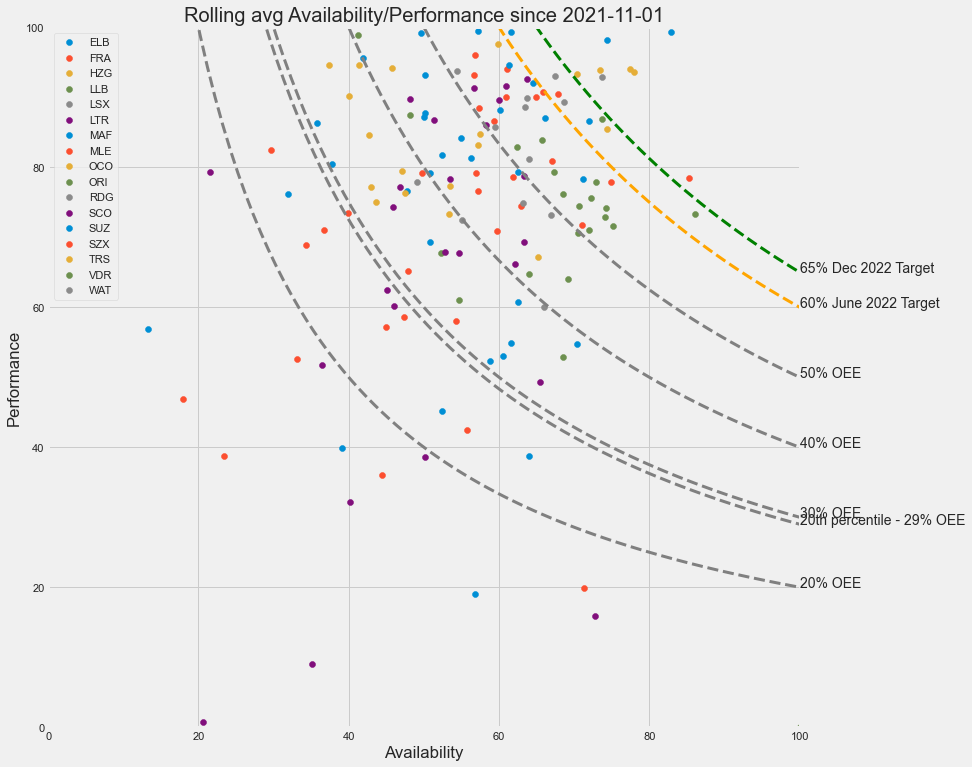

In [148]:
def oee_line(x, target):
    y = (target/x)
    return y

x = active_rolling['Availability %']
y = active_rolling['Performance %']

plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,12))

# ['Line', 'Date', 'OEE %', 'Performance %', 'Availability %', 'Plant']
# i don't think it makes sense to use rolling mean here - it creates a row for every data point.  We just want the mean for each line
# data = active_rolling.groupby(['Plant','Line'])[['Availability %','Performance %']].rolling(window=4).mean().reset_index()
data = active_rolling.groupby(['Plant','Line'])[['Availability %','Performance %']].mean().reset_index()

plt

for plant in data.Plant.unique():
    plt.scatter(data[data.Plant == plant]['Availability %'], data[data.Plant == plant]['Performance %'], label=plant)

    # plt.xlim(0, 100)
    # plt.ylim(0, 100)

plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 60), c='orange', lw=3, ls='--', label='_60% June 2022 Target')
plt.annotate(xy=(100,60), text='60% June 2022 Target')
plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 65), c='green', lw=3, ls='--', label='_65% December 2022 Target')
plt.annotate(xy=(100,65), text='65% Dec 2022 Target')
for pct in [20]:
    pctl = int(np.percentile(active_rolling['OEE %'], pct))
    plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), pctl), c='gray', lw=3, ls='--', label='_{}%'.format(pctl))
    plt.annotate(xy=(100,pctl), text='{}th percentile - {}% OEE'.format(pct, pctl))
for pct in [20,30,40,50]:
    plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), pct), c='gray', lw=3, ls='--', label='_{}%'.format(pct))
    plt.annotate(xy=(100,pct), text='{}% OEE'.format(pct))
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Availability')
plt.ylabel('Performance')
plt.legend()
plt.title('Rolling avg Availability/Performance since {}'.format(start_date))


In [123]:
np.linspace(0,1,len(plants))

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    ])

In [97]:
  data = active_rolling.groupby(['Plant'])[['Availability %','Performance %']].rolling(window=4).mean().reset_index()
  data.groupby('Plant').mean().reset_index()

,Plant,level_1,Availability %,Performance %
0,ELB,183.000000,53.835558,47.375230
1,FRA,1246.082126,51.060902,96.622908
2,HZG,2556.051724,69.517368,98.656294
3,LLB,3122.345455,69.954018,75.995670
4,LSX,4109.269231,63.832069,81.115241
5,LTR,4797.659091,51.168997,58.676376
6,MAF,5479.280488,61.559825,90.737796
7,MLE,5977.500000,71.363005,19.906905
8,OCO,6590.622642,58.405231,82.429947
9,ORI,7135.250000,90.735648,26.688895


In [47]:
rank = active_rolling.groupby('Line').mean().rank(pct=True)

In [48]:
for metric in ['OEE %','Performance %','Availability %','Quality %']:
    print (np.percentile(active_rolling[metric],80))

active_rolling.describe()

59.204571526527666
nan
70.32434408631062
nan


,OEE %,Performance %,Availability %,Quality %
count,1182.000000,1118.000000,1182.000000,1020.000000
mean,48.590957,95.897691,55.939961,99.663791
std,64.688100,161.044499,17.687992,1.260551
min,0.000000,-42.717650,-54.973380,89.823088
25%,33.478434,69.838758,46.448800,99.981427
50%,46.007879,81.755147,58.233422,100.000000
75%,56.642889,92.749796,67.961594,100.000000
max,1127.231930,2622.161796,100.000000,106.197594


In [49]:
active_rolling['category'] = pd.qcut(active_rolling['OEE %'], 5, labels=False)

[Text(0.5, 0, '%')]

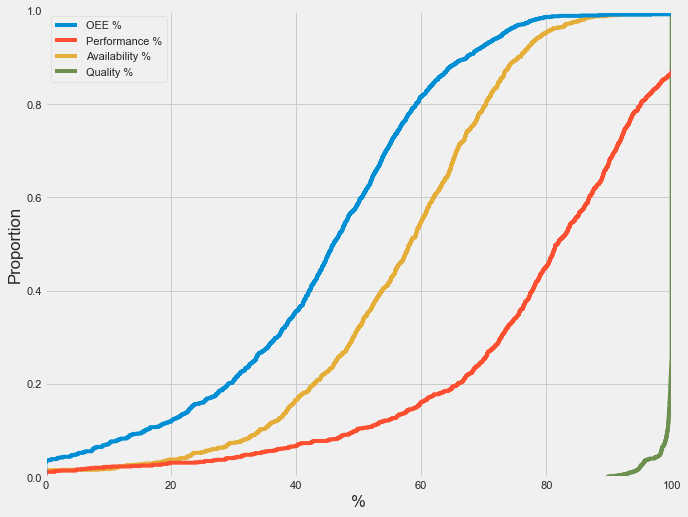

In [50]:
import seaborn as sns
ax = sns.ecdfplot(data=active_rolling[['OEE %','Performance %','Availability %', 'Quality %']])
ax.set(xlim=(0,100))
ax.set(xlabel='%')

In [51]:
df[df['Performance %'] > 100]['Performance %']

Date
2020-02-09    104.115826
2020-02-16    160.018977
2020-02-16    204.314209
2020-02-16    101.396788
2020-03-01    122.416514
                 ...    
2022-01-16    137.957819
2022-01-16    100.581938
2022-01-16    121.245767
2022-01-16    100.014760
2022-01-16    108.564018
Name: Performance %, Length: 924, dtype: float64

Calculate OEE using the individual metrics and see whether the provided OEE% is accurate

In [52]:
active_rolling['CalcOEE'] = active_rolling['Performance %'] * active_rolling['Availability %'] * active_rolling['Quality %']/10000

In [53]:
active_rolling['OEECalcDiff'] = (active_rolling['OEE %']/active_rolling['CalcOEE'])

Scatter plot the reported OEE% against our calculated OEE%

Text(0.5, 1.0, 'Reported OEE % versus Calculated OEE %')

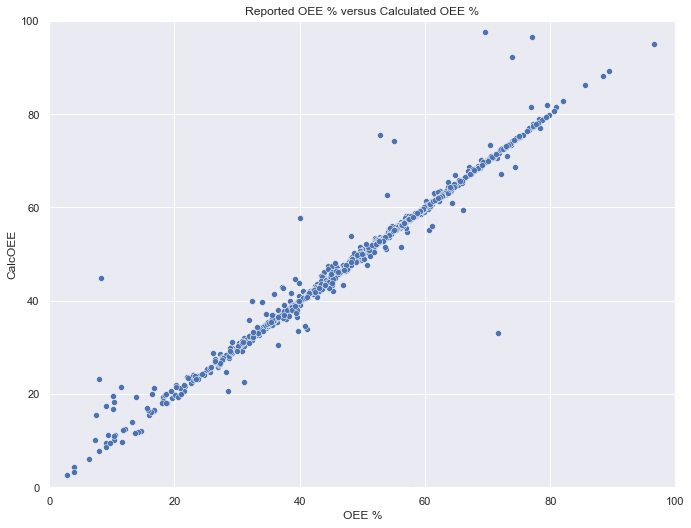

In [60]:

sns.set(rc={"figure.figsize":(10,8)})
sns.scatterplot(data=active_rolling, x='OEE %', y='CalcOEE')
plt.ylim(0,100)
plt.xlim(0,100)
plt.title('Reported OEE % versus Calculated OEE %')




In [55]:
active_rolling.OEECalcDiff.fillna(0, inplace=True)

In [56]:
active_rolling[['OEE %','CalcOEE', 'OEECalcDiff']].describe()

,OEE %,CalcOEE,OEECalcDiff
count,1182.000000,1020.000000,1182.000000
mean,48.590957,53.721552,0.719978
std,64.688100,68.182953,3.873912
min,0.000000,-1.155560,-126.800882
25%,33.478434,38.777480,0.986035
50%,46.007879,48.693740,0.999406
75%,56.642889,58.179859,1.002754
max,1127.231930,1005.240302,2.160654


In [57]:
active_rolling[active_rolling['OEE %'] > 100]

,Line,Date,OEE %,Performance %,Availability %,Quality %,Plant,category,CalcOEE,OEECalcDiff
1584,"FRA - FF Packaging, HV01",2021-12-26,1127.231930,1140.995226,75.026566,100.000000,FRA,4,856.049536,1.316784
1784,"FRA - FF Packaging, VL44",2021-12-26,598.636515,1427.272873,39.219878,100.000000,FRA,4,559.774676,1.069424
2062,"FRA - FF Packaging, VL6",2021-12-26,891.456514,2622.161796,38.448710,99.707684,FRA,4,1005.240302,0.886809
3186,LLB - IMA-1 Packaging (SOLD),2021-11-14,107.707870,148.524727,73.016288,100.000000,LLB,4,108.447242,0.993182
9948,WAT - LYO INSPECTION,2021-11-21,752.776227,1957.908943,42.497913,100.000000,WAT,4,832.070440,0.904703
9949,WAT - LYO INSPECTION,2021-11-28,867.794159,2317.030726,41.796131,100.000000,WAT,4,968.429196,0.896084
9950,WAT - LYO INSPECTION,2021-12-05,804.686024,2096.128158,43.004340,100.000000,WAT,4,901.426086,0.892681
9951,WAT - LYO INSPECTION,2021-12-12,803.807887,2103.993699,35.108300,100.000000,WAT,4,738.676426,1.088173
9952,WAT - LYO INSPECTION,2021-12-19,158.914486,475.987034,39.608879,100.000000,WAT,4,188.533128,0.842900


In [58]:
active_rolling[active_rolling['Performance %'] > 100]

,Line,Date,OEE %,Performance %,Availability %,Quality %,Plant,category,CalcOEE,OEECalcDiff
34,ELB - Extraction B12 1st cycle,2021-11-07,79.533013,172.574119,47.490781,100.000000,ELB,4,81.956797,0.970426
35,ELB - Extraction B12 1st cycle,2021-11-14,82.036803,154.393102,53.593807,100.000000,ELB,4,82.745141,0.991440
36,ELB - Extraction B12 1st cycle,2021-11-21,85.537994,158.633616,54.358192,100.000000,ELB,4,86.230365,0.991971
37,ELB - Extraction B12 1st cycle,2021-11-28,71.608727,103.289031,32.086806,100.000000,ELB,4,33.142150,2.160654
322,ELB - FERMENTATION V09,2021-11-07,67.102706,106.529243,64.460507,100.000000,ELB,4,68.669291,0.977187
...,...,...,...,...,...,...,...,...,...,...
9975,WAT - LYO Packaging Line 9,2021-11-28,26.462903,126.347437,22.711537,94.364311,WAT,0,27.078259,0.977275
9976,WAT - LYO Packaging Line 9,2021-12-05,32.589871,164.663977,21.221754,94.987313,WAT,1,33.192922,0.981832
9977,WAT - LYO Packaging Line 9,2021-12-12,33.162075,152.586467,23.514165,95.569884,WAT,1,34.289933,0.967108
9978,WAT - LYO Packaging Line 9,2021-12-19,37.531273,154.902523,26.594611,94.794501,WAT,1,39.051280,0.961077


In [59]:
active_rolling[['OEE %','Performance %','Availability %']].describe()

,OEE %,Performance %,Availability %
count,1182.000000,1118.000000,1182.000000
mean,48.590957,95.897691,55.939961
std,64.688100,161.044499,17.687992
min,0.000000,-42.717650,-54.973380
25%,33.478434,69.838758,46.448800
50%,46.007879,81.755147,58.233422
75%,56.642889,92.749796,67.961594
max,1127.231930,2622.161796,100.000000
